In [0]:
# STEP 1 :
import numpy as np 
from sklearn.datasets import load_sample_images
import matplotlib.pyplot as plt
%matplotlib inline

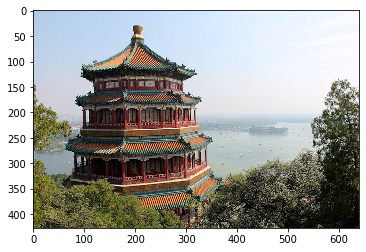

In [8]:
# load sample images
dataset = load_sample_images()
plt.imshow(dataset['images'][0])

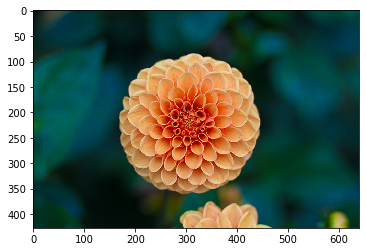

In [9]:
plt.imshow(dataset['images'][1])

In [24]:
type(dataset)

sklearn.utils.Bunch

In [12]:
dataset['images'][0].shape

(427, 640, 3)

In [0]:
height , width , channels  = dataset['images'][0].shape

In [16]:
# create 2 filters

filters = np.zeros(shape=(7,7,channels,2),dtype='float32')
filters.shape

(7, 7, 3, 2)

In [0]:
filters[:,3,:,0] = 1 # vertical line 
filters[3,:,:,1] = 1 # horizontal line

In [21]:
# create the graph 
import tensorflow as tf
%tensorflow_version 1.x

In [0]:
# STEP 2: CONVOLUTIONAL LAYER
X = tf.placeholder(tf.float32,shape=(None,height,width,channels))
convolution = tf.nn.conv2d(X,filters,strides=[1,2,2,1],padding='SAME')

In [0]:
with tf.Session() as sess:

  output = sess.run(convolution,feed_dict={X:dataset['images']})

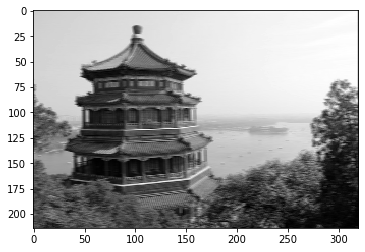

In [31]:
plt.imshow(output[0,:,:,0],cmap="gray")

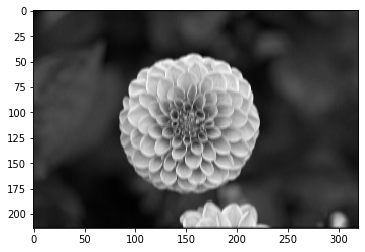

In [29]:
plt.imshow(output[1,:,:,0],cmap='gray')

In [30]:
output.shape

(2, 214, 320, 2)

(2, 213, 320, 3)


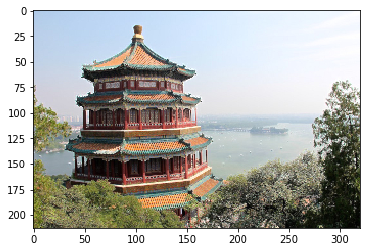

In [41]:
# STEP3 : POLLING LAYER

X = tf.placeholder(tf.float32,shape=(None,height,width,channels))
max_pool = tf.nn.max_pool(X,ksize=[1,2,2,1],strides=[1,2,2,1],padding="VALID")

with tf.Session() as sess:
  output_pool = sess.run(max_pool,feed_dict={X:dataset['images']})

print(output_pool.shape)
plt.imshow(output_pool[0].astype(np.uint8))

In [0]:
# https://www.aclweb.org/anthology/P16-1098.pdf

In [0]:
import pandas as pd
import seaborn as sns
import pickle

In [70]:
df = pd.read_csv('/content/Text_Similarity_Dataset.csv',index_col='Unique_ID')
df.head()

,text1,text2
Unique_ID,,
0,savvy searchers fail to spot ads internet sear...,newcastle 2-1 bolton kieron dyer smashed home ...
1,millions to miss out on the net by 2025 40% o...,nasdaq planning $100m share sale the owner of ...
2,young debut cut short by ginepri fifteen-year-...,ruddock backs yapp s credentials wales coach m...
3,diageo to buy us wine firm diageo the world s...,mci shares climb on takeover bid shares in us ...
4,be careful how you code a new european directi...,media gadgets get moving pocket-sized devices ...


In [49]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [0]:
df.text1 = df.text1.apply(lambda x : lemmatizer.lemmatize(x))
df.text2 = df.text2.apply(lambda x : lemmatizer.lemmatize(x))

In [52]:
df.head()

,text1,text2
Unique_ID,,
0,savvy searchers fail to spot ads internet sear...,newcastle 2-1 bolton kieron dyer smashed home ...
1,millions to miss out on the net by 2025 40% o...,nasdaq planning $100m share sale the owner of ...
2,young debut cut short by ginepri fifteen-year-...,ruddock backs yapp s credentials wales coach m...
3,diageo to buy us wine firm diageo the world s...,mci shares climb on takeover bid shares in us ...
4,be careful how you code a new european directi...,media gadgets get moving pocket-sized devices ...


In [89]:
print(df.text1[:2])
print("\n")

dff = df.copy()

Unique_ID
0    savvy searchers fail to spot ads internet sear...
1    millions to miss out on the net by 2025  40% o...
Name: text1, dtype: object




In [75]:
dfff.text1 = 

'million'

In [71]:
for i in df.text1:
  lemmatizer.lemmatize(i)

for i in df.text2:
  lemmatizer.lemmatize(i)


df.head()

,text1,text2
Unique_ID,,
0,savvy searchers fail to spot ads internet sear...,newcastle 2-1 bolton kieron dyer smashed home ...
1,millions to miss out on the net by 2025 40% o...,nasdaq planning $100m share sale the owner of ...
2,young debut cut short by ginepri fifteen-year-...,ruddock backs yapp s credentials wales coach m...
3,diageo to buy us wine firm diageo the world s...,mci shares climb on takeover bid shares in us ...
4,be careful how you code a new european directi...,media gadgets get moving pocket-sized devices ...


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
tfidf = TfidfVectorizer(stop_words="english")